# Implementação de Árvores de Decisão usando Entropia e Índice de Gini

Este notebook explora a construção de árvores de decisão utilizando dois critérios de divisão: Entropia e Índice de Gini. 


### Análise Exploratória dos Dados

Vamos explorar brevemente os dados para entender melhor as características e relações presentes.


In [5]:
# leitura dos dados
import pandas as pd

df = pd.read_json("./Data/bank_data.json")
display(df)
print('\n')
print(df.info())

,História de Crédito,Dívida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,0 a 15k,Alto
1,Desconhecida,Alta,Nenhuma,15 a 35k,Alto
2,Desconhecida,Baixa,Nenhuma,15 a 35k,Moderado
3,Desconhecida,Baixa,Nenhuma,0 a 15k,Alto
4,Desconhecida,Baixa,Nenhuma,Acima de 35k,Baixo
5,Desconhecida,Baixa,Adequada,Acima de 35k,Baixo
6,Ruim,Baixa,Nenhuma,0 a 15k,Alto
7,Ruim,Baixa,Adequada,Acima de 35k,Moderado
8,Boa,Baixa,Nenhuma,Acima de 35k,Baixo
9,Boa,Baixa,Adequada,Acima de 35k,Baixo




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   História de Crédito  20 non-null     object
 1   Dívida               20 non-null     object
 2   Garantia             20 non-null     object
 3   Renda                20 non-null     object
 4   Risco                20 non-null     object
dtypes: object(5)
memory usage: 932.0+ bytes
None


### Preparando os dados 

Para obter melhor resultados e poder usar a ferramenta selecionada para construção da arvore, *Scikit Learn*, realizaremos um mapemento dos atributos "str" para "int".

In [7]:
# Convertendo os dados em um DataFrame

df_encoded = df.copy()
df_encoded['Garantia'] = df_encoded['Garantia'].astype('category').cat.codes
df_encoded['Renda'] = df_encoded['Renda'].astype('category').cat.codes
df_encoded['História de Crédito'] = df_encoded['História de Crédito'].astype('category').cat.codes
df_encoded['Risco'] = df_encoded['Risco'].astype('category').cat.codes
df_encoded["Dívida"] = df_encoded["Dívida"].astype('category').cat.codes

df_encoded.head()

,História de Crédito,Dívida,Garantia,Renda,Risco
0,2,0,1,0,0
1,1,0,1,1,0
2,1,1,1,1,2
3,1,1,1,0,0
4,1,1,1,2,1


### Dessa forma, podemos seguir com a seguinte abordagem...

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
from sklearn.tree import export_text


# Separando os dados
X = df_encoded.drop(columns='Risco')
y = df_encoded['Risco']

### Resultados usando a Entropia 

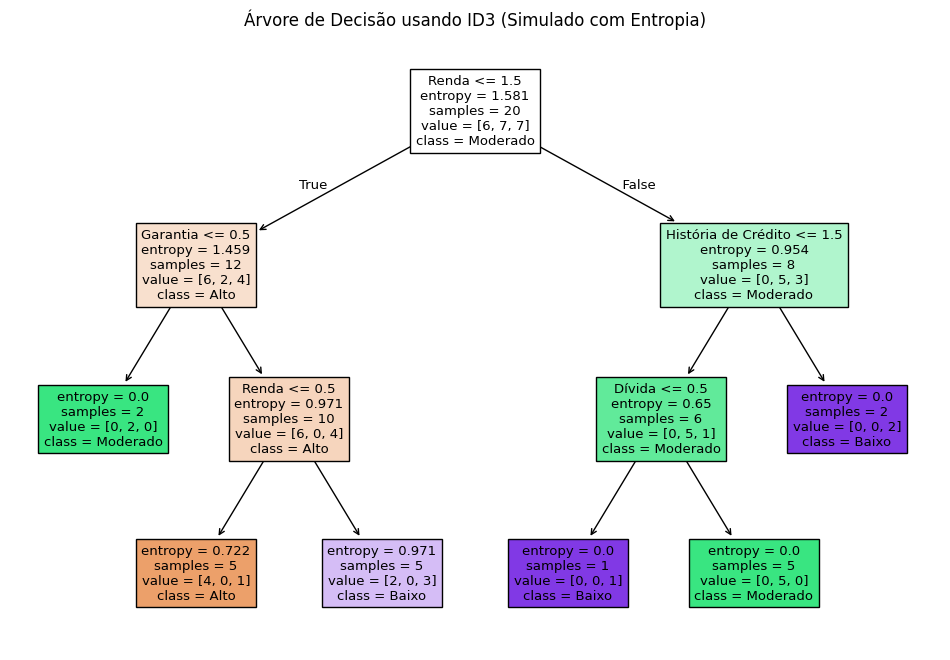

In [10]:
# Modelo ID3
clf_id3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
clf_id3.fit(X, y)

# Plot da árvore ID3
plt.figure(figsize=(12, 8))
plot_tree(clf_id3, filled=True, feature_names=X.columns, class_names=['Alto', 'Moderado', 'Baixo'])
plt.title("Árvore de Decisão usando ID3 (Simulado com Entropia)")
plt.show()


In [13]:
# Outra forma de plotar a árvore
rules_id3 = export_text(clf_id3, feature_names=list(X.columns))
print("Regras da Árvore de Decisão ID3:\n", rules_id3)


Regras da Árvore de Decisão ID3:
 |--- Renda <= 1.50
|   |--- Garantia <= 0.50
|   |   |--- class: 1
|   |--- Garantia >  0.50
|   |   |--- Renda <= 0.50
|   |   |   |--- class: 0
|   |   |--- Renda >  0.50
|   |   |   |--- class: 2
|--- Renda >  1.50
|   |--- História de Crédito <= 1.50
|   |   |--- Dívida <= 0.50
|   |   |   |--- class: 2
|   |   |--- Dívida >  0.50
|   |   |   |--- class: 1
|   |--- História de Crédito >  1.50
|   |   |--- class: 2



### Resultados usando Índice de Gini

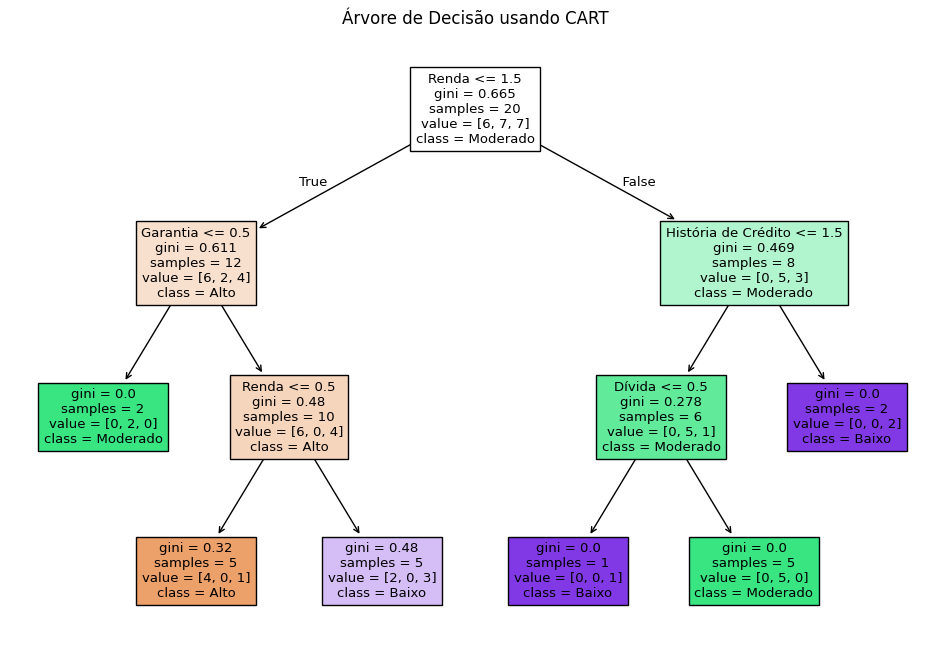

In [12]:
# Modelo CART
clf_cart = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
clf_cart.fit(X, y)

# Plot da árvore CART
plt.figure(figsize=(12, 8))
plot_tree(clf_cart, filled=True, feature_names=X.columns, class_names=['Alto', 'Moderado', 'Baixo'])
plt.title("Árvore de Decisão usando CART")
plt.show()


In [14]:
# Outra forma de plotar a árvore
rules_cart = export_text(clf_cart, feature_names=list(X.columns))
print("Regras da Árvore de Decisão CART:\n", rules_cart)




Regras da Árvore de Decisão CART:
 |--- Renda <= 1.50
|   |--- Garantia <= 0.50
|   |   |--- class: 1
|   |--- Garantia >  0.50
|   |   |--- Renda <= 0.50
|   |   |   |--- class: 0
|   |   |--- Renda >  0.50
|   |   |   |--- class: 2
|--- Renda >  1.50
|   |--- História de Crédito <= 1.50
|   |   |--- Dívida <= 0.50
|   |   |   |--- class: 2
|   |   |--- Dívida >  0.50
|   |   |   |--- class: 1
|   |--- História de Crédito >  1.50
|   |   |--- class: 2

